# Mini Project 2 - Predicting Myopia in Children Based on Biometric and Lifestyle Factors

**Problem**  
Can we predict whether a child is likely to develop myopia based on lifestyle and genetic factors?

**Stakeholder**  
Optometrists and Public Health Systems
    
**Value**  
Myopia is increasing globally due to lifestyle changes. Early identification of at risk children allows for preventative actions, which can reduce long-term eye health issues.

## Load Data  
Orinda Longitudinal Study of Myopia - OLSM (Source: Kaggle)  

In [864]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [866]:
#Load data from csv file
myopia = 'myopia.csv'
df = pd.read_csv(myopia, index_col=0)

## EDA - Slide 7

In [869]:
df.head()

,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
ID,,,,,,,,,,,,,,,,,
1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [871]:
df.shape

(618, 17)

In [873]:
df.info() #check data type and if missing values present

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 1 to 618
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STUDYYEAR  618 non-null    int64  
 1   MYOPIC     618 non-null    int64  
 2   AGE        618 non-null    int64  
 3   GENDER     618 non-null    int64  
 4   SPHEQ      618 non-null    float64
 5   AL         618 non-null    float64
 6   ACD        618 non-null    float64
 7   LT         618 non-null    float64
 8   VCD        618 non-null    float64
 9   SPORTHR    618 non-null    int64  
 10  READHR     618 non-null    int64  
 11  COMPHR     618 non-null    int64  
 12  STUDYHR    618 non-null    int64  
 13  TVHR       618 non-null    int64  
 14  DIOPTERHR  618 non-null    int64  
 15  MOMMY      618 non-null    int64  
 16  DADMY      618 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 86.9 KB


In [875]:
df.describe() #summary of statistics for each numerical column

,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1992.359223,0.131068,6.299353,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,1.734507,0.337748,0.712950,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,1990.000000,0.000000,5.000000,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,1991.000000,0.000000,6.000000,0.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,1992.000000,0.000000,6.000000,0.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,1994.000000,0.000000,6.000000,1.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,1995.000000,1.000000,9.000000,1.000000,4.372000,24.560000,4.250000,4.112000,17.300000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [877]:
#Standardize Column Headers
df.columns = df.columns.str.lower()

df = df.rename(columns={
    'studyyear': 'study_year',
    'sporthr': 'sport_hr',
    'readhr': 'read_hr',
    'comphr': 'comp_hr',
    'studyhr': 'study_hr',
    'tvhr': 'tv_hr',
    'diopterhr': 'diopter_hr',
    'mommy': 'mom_my',
    'dadmy': 'dad_my'
})
df.head()

,study_year,myopic,age,gender,spheq,al,acd,lt,vcd,sport_hr,read_hr,comp_hr,study_hr,tv_hr,diopter_hr,mom_my,dad_my
ID,,,,,,,,,,,,,,,,,
1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [879]:
#Drop irrelevant columns
df.drop(columns = ['study_year','spheq']) #basically indicates whether child is myopic or not

,myopic,age,gender,al,acd,lt,vcd,sport_hr,read_hr,comp_hr,study_hr,tv_hr,diopter_hr,mom_my,dad_my
ID,,,,,,,,,,,,,,,
1,1,6,1,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
2,0,6,1,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
3,0,6,1,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
4,1,6,1,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,0,5,0,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,1,6,0,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
615,0,6,1,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
616,0,6,0,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1


In [881]:
df['myopic'].value_counts(normalize=True)

myopic
0    0.868932
1    0.131068
Name: proportion, dtype: float64

#### Data Visualization - Slide 8 & 9

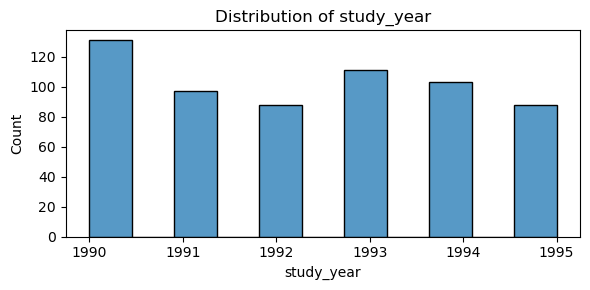

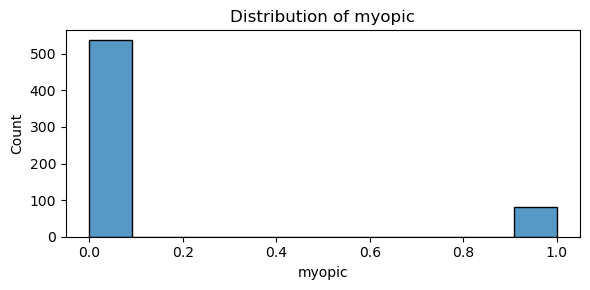

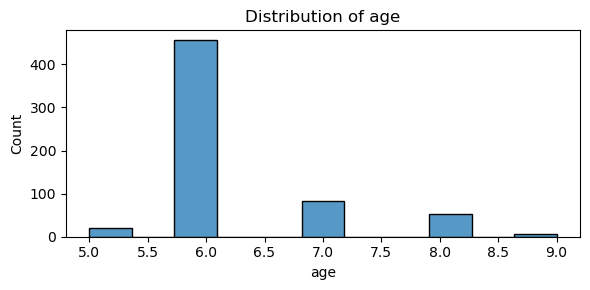

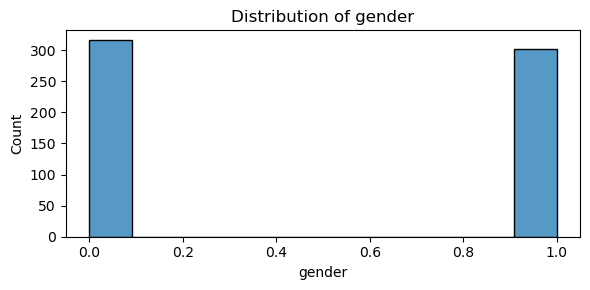

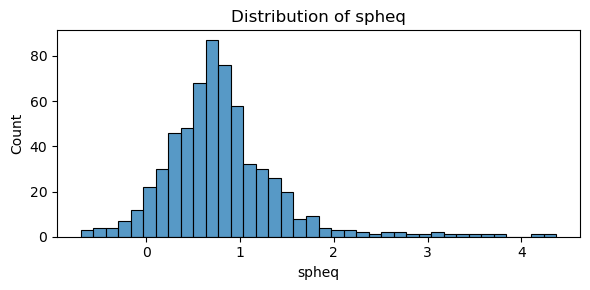

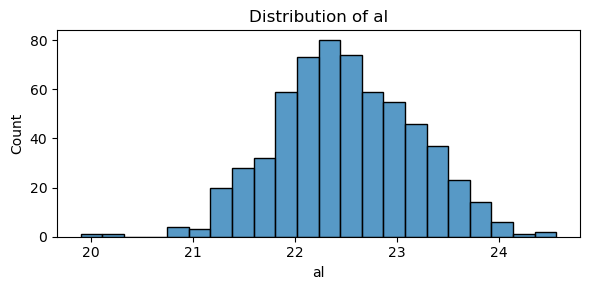

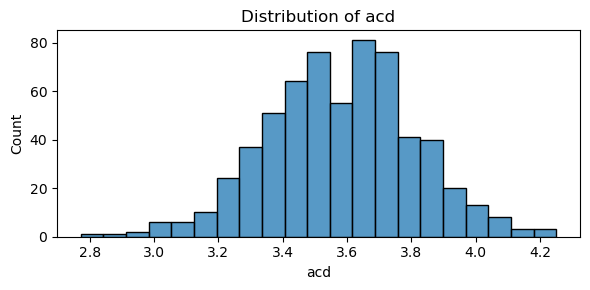

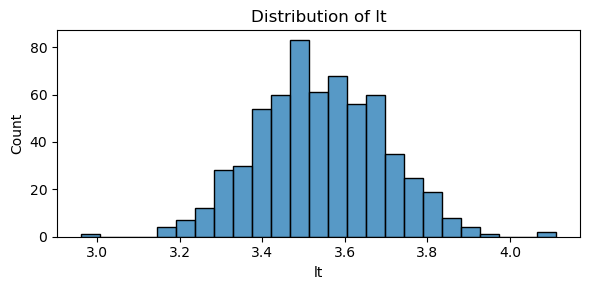

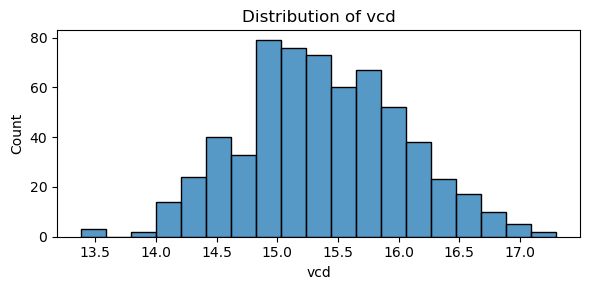

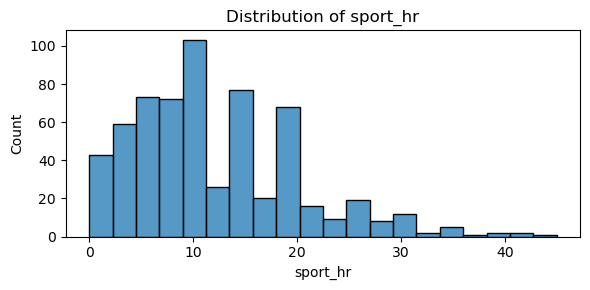

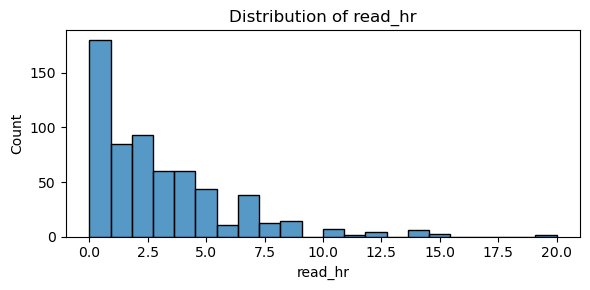

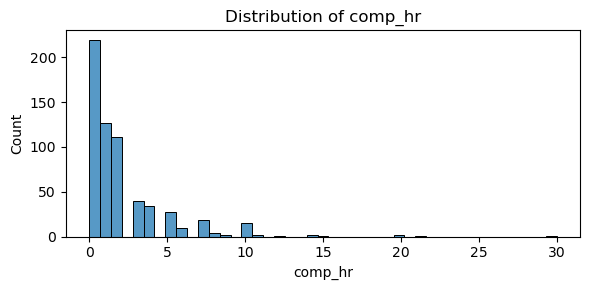

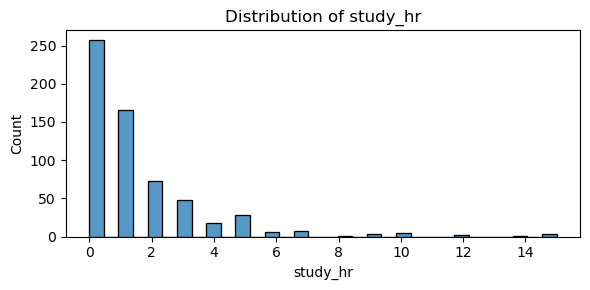

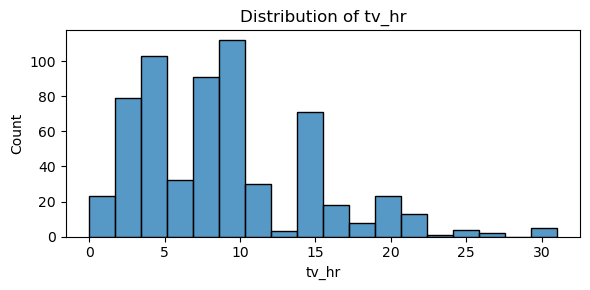

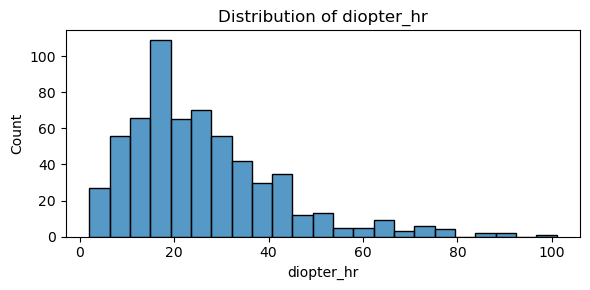

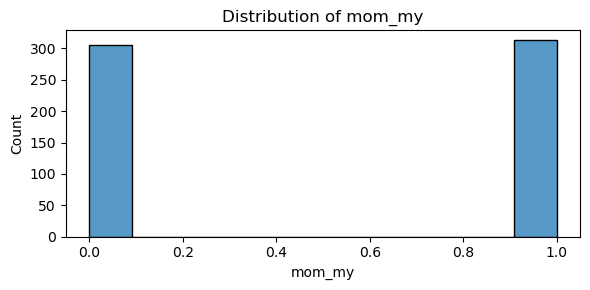

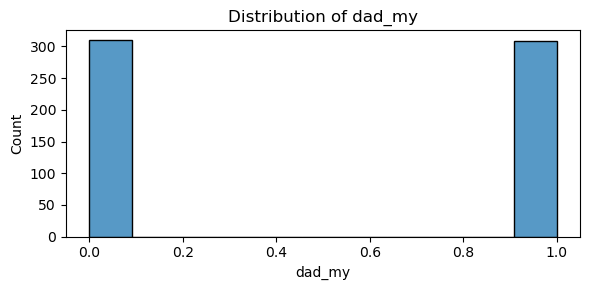

In [884]:
#Univarate Analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

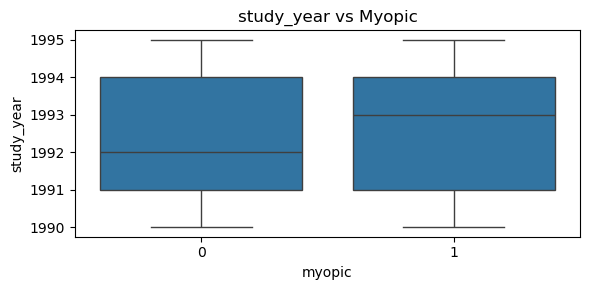

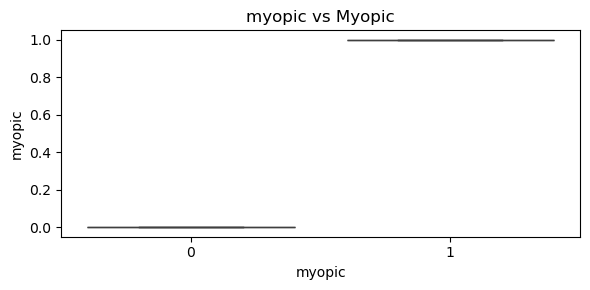

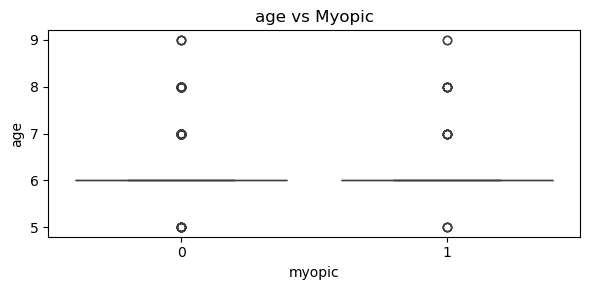

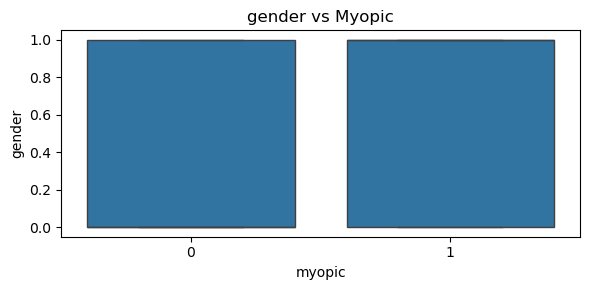

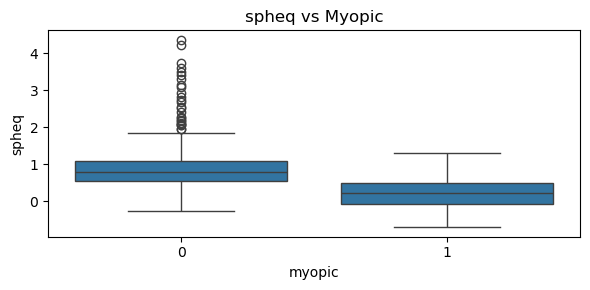

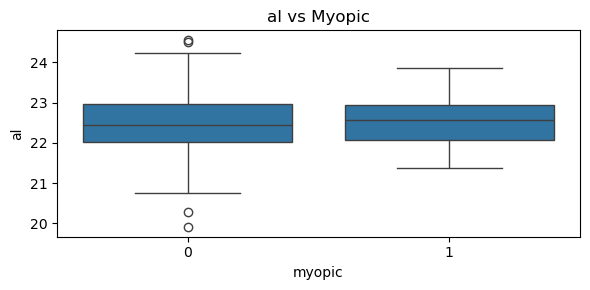

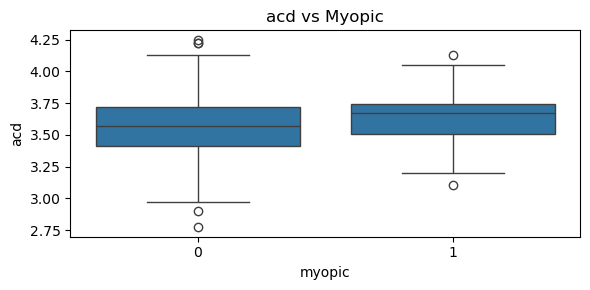

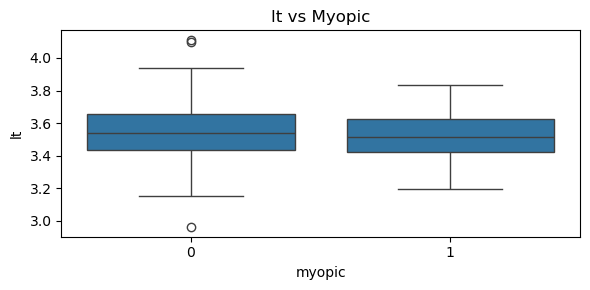

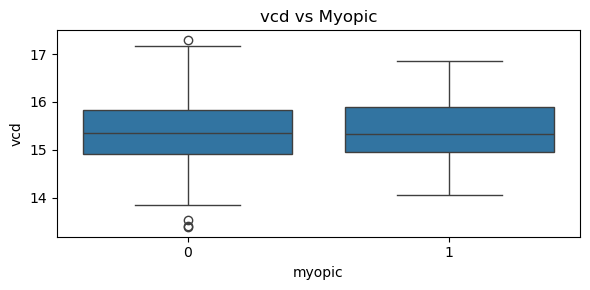

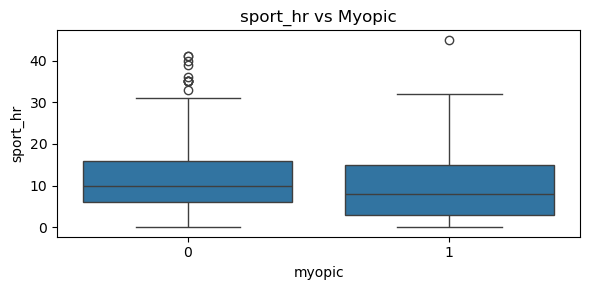

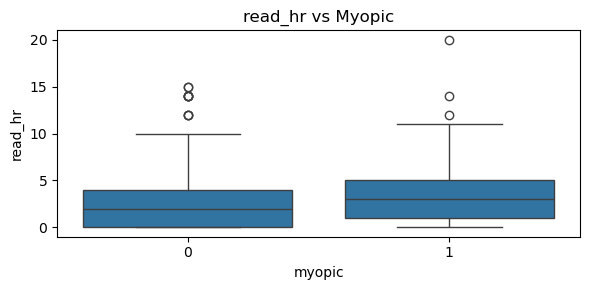

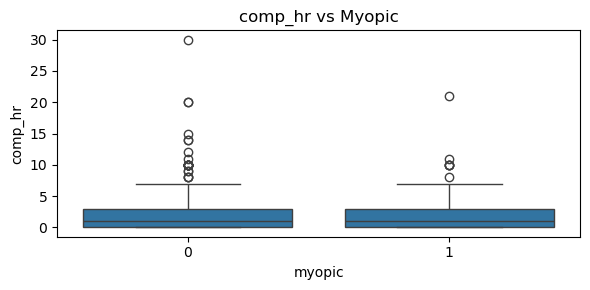

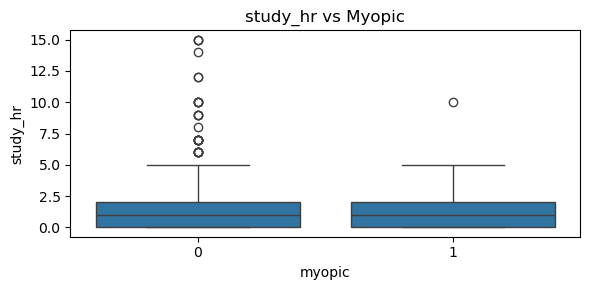

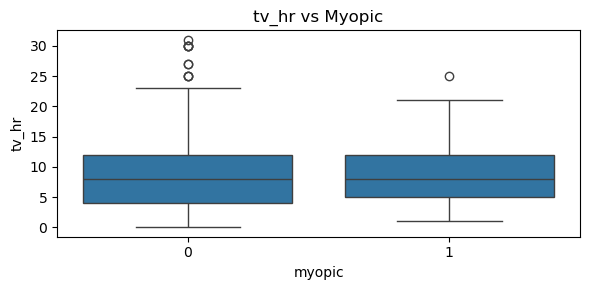

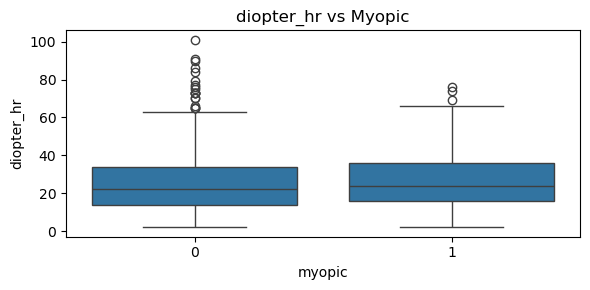

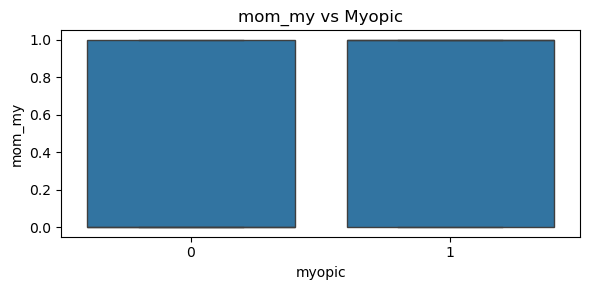

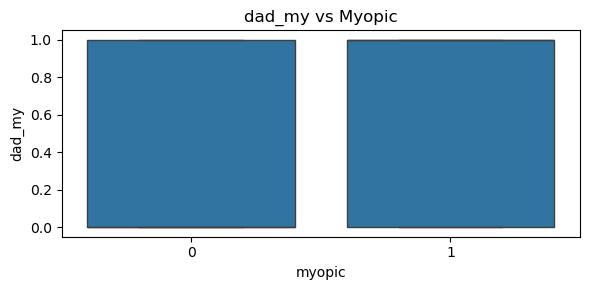

In [886]:
#Bivariate Analysis
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x = 'myopic',y=col, data=df)
    plt.title(f'{col} vs Myopic')
    plt.tight_layout()
    plt.show()

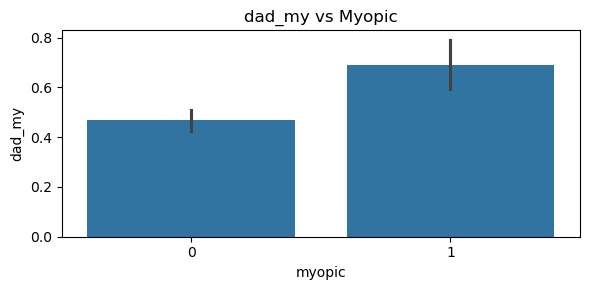

In [888]:
plt.figure(figsize=(6,3))
sns.barplot(x = 'myopic',y='dad_my', data=df)
plt.title('dad_my vs Myopic')
plt.tight_layout()
plt.show()

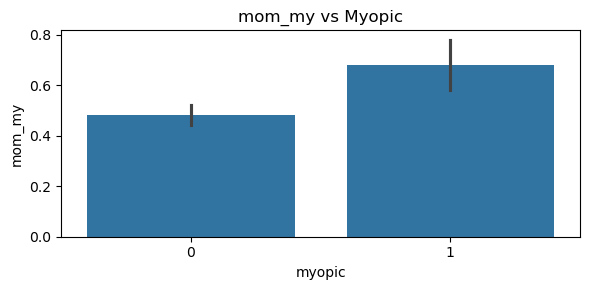

In [890]:
plt.figure(figsize=(6,3))
sns.barplot(x = 'myopic',y='mom_my', data=df)
plt.title('mom_my vs Myopic')
plt.tight_layout()
plt.show()

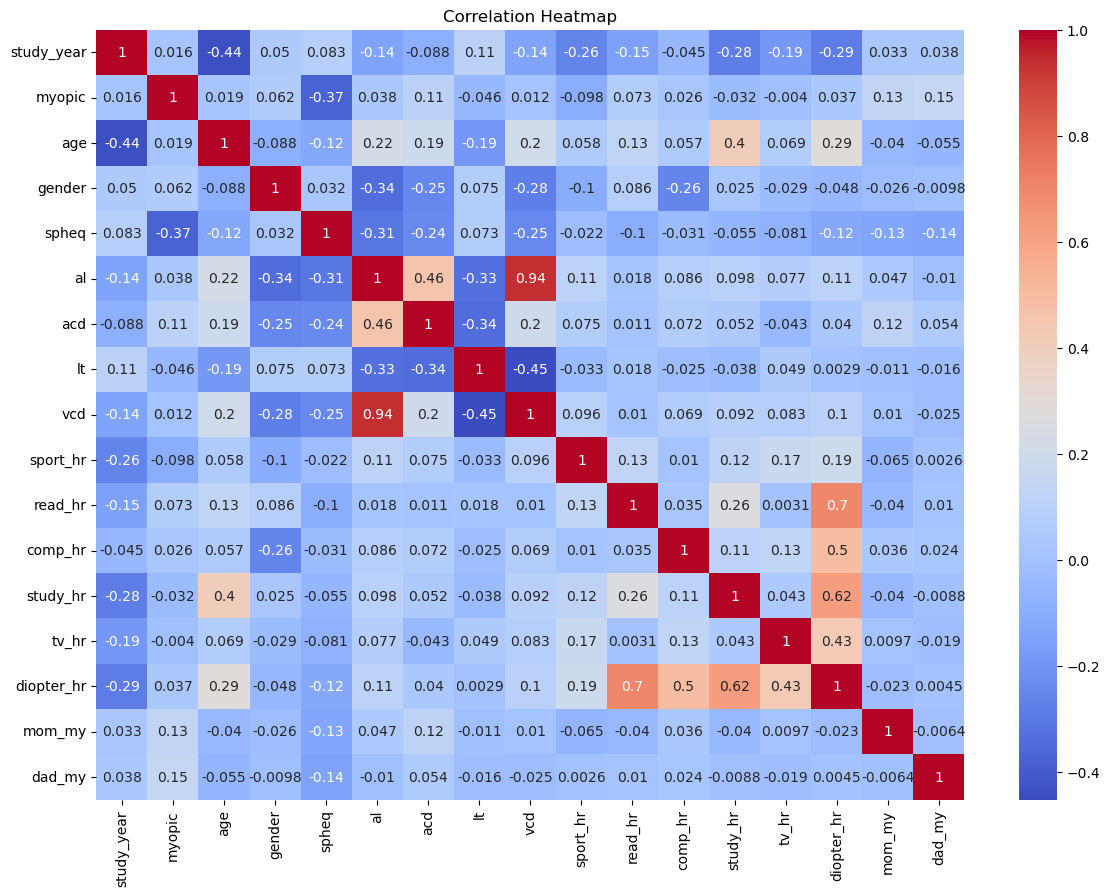

In [892]:
#Multivariate Analysis
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Modeling** - Support Vector Model
**Separates myopic and non-myopic classes with margins**  
Features (X) - Age, Gender, AL, ACD, LT, VCD, Sports Hrs, Read Hrs, Comp Hrs, Study Hrs, TV Hrs, Diopter Hrs, Mom Myopic, Dad Myopic  
Target (y) - Myopic  

**Split the data**

In [922]:
#Train-test-split
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['myopic'])
y = df['myopic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Train:', X_train.shape)
print('Test:',X_test.shape)
print('Myopic Train Proportion:', y_train.value_counts(normalize = True))
print('Myopic Test Proportion: ', y_test.value_counts(normalize = True))

Train: (494, 16)
Test: (124, 16)
Myopic Train Proportion: myopic
0    0.866397
1    0.133603
Name: proportion, dtype: float64
Myopic Test Proportion:  myopic
0    0.879032
1    0.120968
Name: proportion, dtype: float64


**Train Model**

In [925]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

**Fit the Model**

In [928]:
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

**Evaluate Testing Model** 

In [931]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
svm_y_pred = svm_model.predict(X_test_scaled)
svm_y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print('Accuracy:', accuracy_score(y_test, svm_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, svm_y_prob))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('\nClassification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy: 0.8064516129032258
ROC AUC Score: 0.8195718654434251

Confusion Matrix:
 [[93 16]
 [ 8  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       109
           1       0.30      0.47      0.37        15

    accuracy                           0.81       124
   macro avg       0.61      0.66      0.63       124
weighted avg       0.85      0.81      0.82       124



## **Modeling** - Random Forrest
**Automatically captures the complex interactions between biometric and behavioral features**  
Features (X) - Age, Gender, AL, ACD, LT, VCD, Sports Hrs, Read Hrs, Comp Hrs, Study Hrs, TV Hrs, Diopter Hrs, Mom Myopic, Dad Myopic  
Target (y) - Myopic  

**Split the data**

In [934]:
#Train-test-split
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['myopic'])
y = df['myopic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Train:', X_train.shape)
print('Test:',X_test.shape)
print('Myopic Train Proportion:', y_train.value_counts(normalize = True))
print('Myopic Test Proportion: ', y_test.value_counts(normalize = True))



Train: (494, 16)
Test: (124, 16)
Myopic Train Proportion: myopic
0    0.866397
1    0.133603
Name: proportion, dtype: float64
Myopic Test Proportion:  myopic
0    0.879032
1    0.120968
Name: proportion, dtype: float64


**Train Model**

In [937]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    criterion='gini',
    class_weight='balanced',
    random_state=42
)

**Fit the Model**

In [940]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)

**Evaluate Testing Model** 

In [943]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print('Accuracy:', accuracy_score(y_test, rf_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_y_prob))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('\nClassification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy: 0.8709677419354839
ROC AUC Score: 0.8593272171253823

Confusion Matrix:
 [[102   7]
 [  9   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       109
           1       0.46      0.40      0.43        15

    accuracy                           0.87       124
   macro avg       0.69      0.67      0.68       124
weighted avg       0.86      0.87      0.87       124



## **Modeling** - Logistic Regression Slide 10
**Simple and effective for solving binary classification problems**  
Features (X) - Age, Gender, AL, ACD, LT, VCD, Sports Hrs, Read Hrs, Comp Hrs, Study Hrs, TV Hrs, Diopter Hrs, Mom Myopic, Dad Myopic  
Target (y) - Myopic  

**Split the data**

In [907]:
#Train-test-split
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['myopic'])
y = df['myopic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Train:', X_train.shape)
print('Test:',X_test.shape)
print('Myopic Train Proportion:', y_train.value_counts(normalize = True))
print('Myopic Test Proportion: ', y_test.value_counts(normalize = True))

Train: (494, 16)
Test: (124, 16)
Myopic Train Proportion: myopic
0    0.866397
1    0.133603
Name: proportion, dtype: float64
Myopic Test Proportion:  myopic
0    0.879032
1    0.120968
Name: proportion, dtype: float64


**Train Model**

In [910]:
#Train model with class_weight = 'balanced'
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model = make_pipeline( #pipeline prevents data leakage, chains together the scaling and logistic regression
    StandardScaler(),
    LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear', 
        random_state=42
    )
)

**Fit the Model**

In [913]:
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

**Evaluate Testing Model** - Slide 11

In [951]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate
print('Accuracy:', accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8387096774193549
ROC AUC Score: 0.8470948012232415

Confusion Matrix:
 [[93 16]
 [ 4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       109
           1       0.41      0.73      0.52        15

    accuracy                           0.84       124
   macro avg       0.68      0.79      0.71       124
weighted avg       0.89      0.84      0.86       124



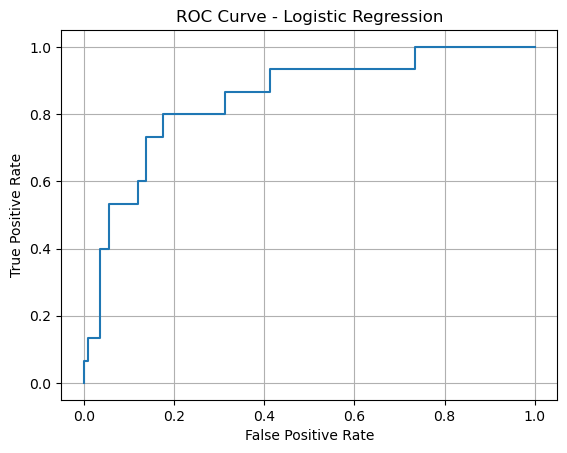

In [953]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.grid(True)
plt.show()
